# UJIAN PRAKTIK DATA SCIENCE
FERDY WAHYUDI_EWAKO

# PERBANDINGAN AKURASI MODEL MENGGUNAKAN MODEL RANDOM FOREST DAN ADABOOST

# IMPORT DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

# LOAD DATA

In [2]:
data = pd.read_csv('IPM.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.9+ KB


# INISIALISASI DATA VARIABEL

In [7]:
#Inisialisasi variabel X
X = data[['Harapan_Lama_Sekolah','Pengeluaran_Perkapita','Rerata_Lama_Sekolah','Usia_Harapan_Hidup']]
X.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
0,14.36,9572,9.37,69.96
1,13.90,7148,9.48,65.28
2,14.32,8776,8.68,67.43
3,14.60,8180,8.88,64.40
4,14.01,8030,9.67,68.22


In [8]:
#Inisialisasi variabel y
y = data['IPM']
y.head()

0      High
1    Normal
2    Normal
3    Normal
4    Normal
Name: IPM, dtype: object

In [19]:
data.describe()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
count,2196.000000,2196.000000,2196.000000,2196.000000
mean,12.931498,10323.144353,8.291585,69.467418
std,1.312967,2664.738311,1.611256,3.437536
min,2.950000,3975.000000,0.850000,54.820000
25%,12.350000,8599.750000,7.390000,67.210000
50%,12.860000,10192.500000,8.180000,69.785000
75%,13.570000,11670.500000,9.180000,71.712500
max,17.800000,23888.000000,12.830000,77.730000


# VISUALISASI DATA

# scatterplot

<AxesSubplot:xlabel='Rerata_Lama_Sekolah', ylabel='Pengeluaran_Perkapita'>

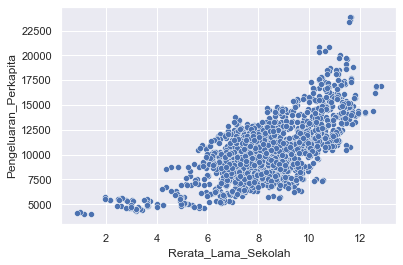

In [58]:
sns.scatterplot(x='Rerata_Lama_Sekolah',y='Pengeluaran_Perkapita',data=data)

# Bar plots

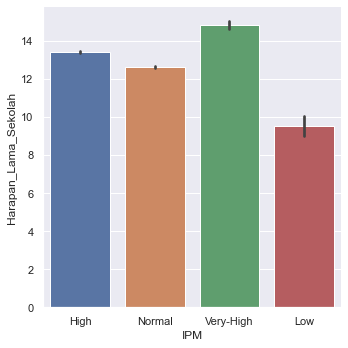

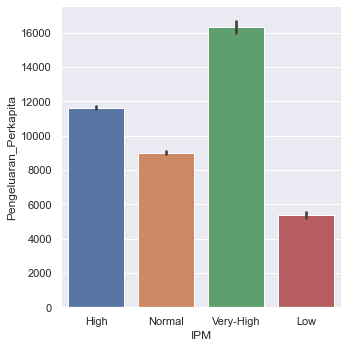

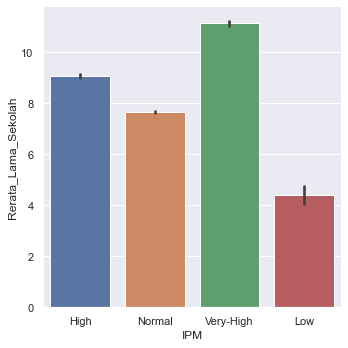

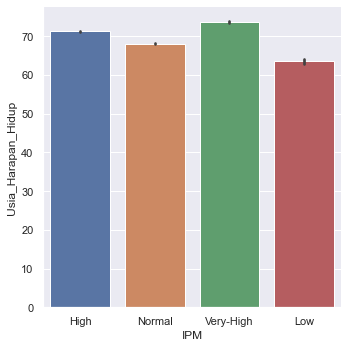

In [51]:
sns.catplot(x="IPM",y="Harapan_Lama_Sekolah",kind='bar',data=data)
sns.catplot(x="IPM",y="Pengeluaran_Perkapita",kind='bar',data=data)
sns.catplot(x="IPM",y="Rerata_Lama_Sekolah",kind='bar',data=data)
sns.catplot(x="IPM",y="Usia_Harapan_Hidup",kind='bar',data=data)

# distplot

<AxesSubplot:xlabel='Pengeluaran_Perkapita', ylabel='Density'>

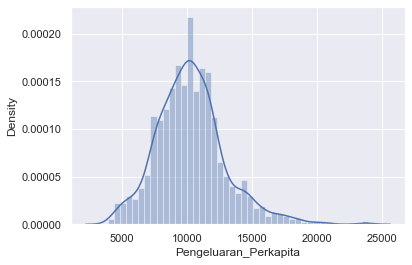

In [29]:
sns.distplot(data['Pengeluaran_Perkapita'])

# Pairplot

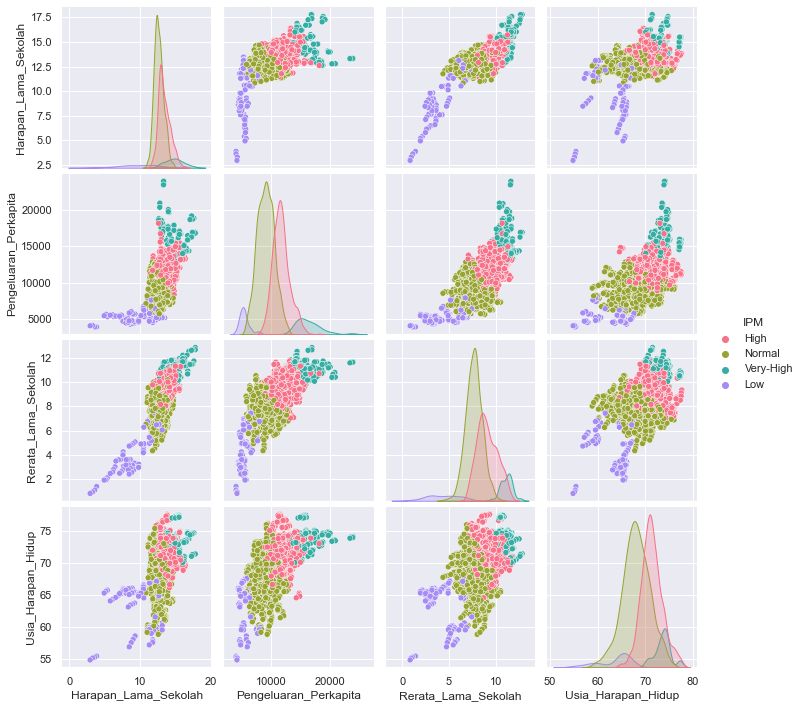

In [34]:
sns.pairplot(data,hue = 'IPM',diag_kind = "kde",kind = "scatter",palette = "husl")

menunjukkan hubungan untuk (n,2) kombinasi variabel dalam DataFrame sebagai plot matriks dan plot diagonal adalah plot univariat.

# PREPROCESSING DATA

In [37]:
#Mengodekan variabel y atau kelas
le=LabelEncoder()

y=le.fit_transform(y)

In [38]:
#Splitting dataset menjadi data training sebesar 70% dan data testing sebesar 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# model Adaboost

In [39]:
#Inisialisasi model Adaboost dengan estimator sebanyak 50
AB = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

In [40]:
#Modelling Adaboost dari data training
model1 = AB.fit(X_train, y_train)

In [41]:
#Inisialisasi hasil prediksi model Adaboost dari data testing dengan nama y_pred
y_pred = model1.predict(X_test)

In [42]:
#Menampilkan hasil prediksi dari data testing
y_pred

array([2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2,
       1, 2, 0, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0,
       1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0,
       0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 1, 0, 2,
       0, 0, 2, 1, 0, 2, 1, 1, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2,
       1, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 1, 0,
       0, 0, 2, 2, 0, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2,

In [43]:
#Nilai akurasi yang diperoleh dari model Adaboost
print('Adaboost Model Accuracy:',accuracy_score(y_test,y_pred))

Adaboost Model Accuracy: 0.7435508345978755


# model Random Forest

In [44]:
#Inisialisasi model Random Forest dengan estimator sebanyak 10
RF = RandomForestClassifier(n_estimators=10, criterion="entropy")

In [45]:
#Modelling Random Forest dari data training
model2 = RF.fit(X_train, y_train)

In [46]:
#Inisialisasi hasil prediksi model Adaboost dari data testing dengan nama y_pred
y_pred2 = model2.predict(X_test)

In [47]:
#Menampilkan hasil prediksi dari data testing
y_pred2

array([2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 3, 0, 3, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 3, 0, 0, 0, 0, 2, 0, 0, 3, 2, 2, 0, 1, 0, 0, 2, 2, 0, 2,
       1, 2, 0, 0, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 2, 3, 0, 2, 3, 0, 2, 0, 0, 1, 0, 0, 2, 0,
       2, 0, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 0, 3, 0, 0, 2, 2, 2, 2, 2, 0,
       3, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 3, 2,
       0, 0, 2, 1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 3, 0, 2, 3, 2, 2, 0, 2,
       1, 2, 0, 0, 2, 2, 2, 2, 3, 2, 2, 0, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2,
       0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 3, 2, 0,
       2, 2, 2, 2, 1, 0, 0, 2, 2, 3, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0,
       0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 0, 3, 0, 0, 0, 0, 2, 2, 2,

In [49]:
#Nilai akurasi yang diperoleh dari model Random Forest
print('Random Forest Model Accuracy:',accuracy_score(y_test,y_pred2))

Random Forest Model Accuracy: 0.9468892261001517


# classification report AdaBoost

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       258
           1       0.49      0.86      0.62        28
           2       0.80      0.82      0.81       331
           3       0.00      0.00      0.00        42

    accuracy                           0.74       659
   macro avg       0.50      0.61      0.54       659
weighted avg       0.70      0.74      0.72       659



# classification report Random Forest

In [55]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       258
           1       1.00      0.86      0.92        28
           2       0.95      0.97      0.96       331
           3       0.95      0.86      0.90        42

    accuracy                           0.95       659
   macro avg       0.96      0.91      0.93       659
weighted avg       0.95      0.95      0.95       659



# KESIMPULAN
Dari hasil perbandingan model yang digunakan yaitu random forest dan adaboost pada data indeks pembangunan manusia, saya mendapatkan kesimpulan bahwa model random forest memiliki akurasi sebesar 94% lebih besar daripada model adaboost dan mendapatkan visualisasi data menggunakan pair plot